## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 16
---------------------------------------

GOALS:

1. Work to understand when a linear model vs. non-linear model is a good choice.
2. Practice plotting residuals and regression lines.
3. Do an analysis using non-linear regression.


----------------------------------------------------------

This homework has **2 Questions** and **3 Exercises**

## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


## Announcements

**Come to Lab!** If you need help we are here to help!

## Day 16 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day16 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day16-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

## Paris Paintings Data - Load the data

To explore the ideas of modeling data we will use the Paris Paintings dataset.

- Source: Printed catalogs of 28 auction sales in Paris, 1764 - 1780 (Historical Data)
- Data curators Sandra van Ginhoven and Hilary Coe Cronheim (who were PhD students in the Duke Art, Law, and Markets Initiative at the time of putting together this dataset) translated and tabulated the catalogs
-  3393 paintings, their prices, and descriptive details from sales catalogs over 60 variables

[Variables in Paris Paintings Data](https://www2.stat.duke.edu/~cr173/Sta112_Fa16/data/paris_paintings.html)

This lab follows the Data Science in a Box units "Unit 4 - Deck 3: Modeling nonlinear relationships " by Mine Çetinkaya-Rundel. It has been updated for our class and translated to Python by Joanna Bieri.

In [83]:
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [85]:
show(DF_raw_paintings)

In [87]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

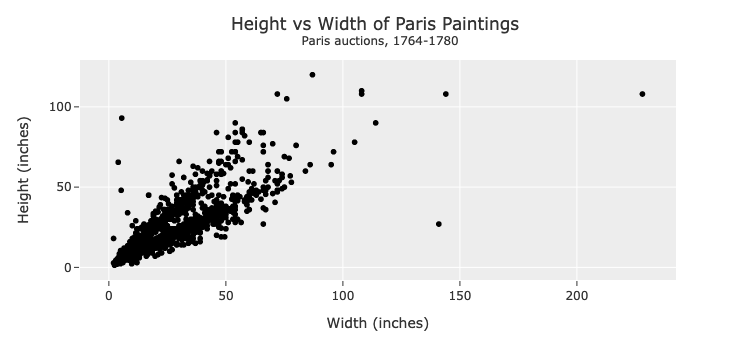

In [89]:
# Update the types - these should be floats
DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))

fig = px.scatter(DF,x='Width_in',y="Height_in",color_discrete_sequence=['black'])

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

## Explore Linearity

Fit a model for Price as a function of size. Let's redo that analysis except this time focus only on paintings with area of less than 10,000 inches squared.

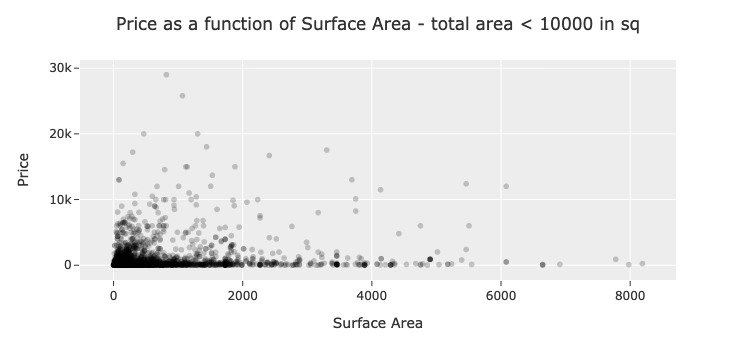

Model Score:
0.014875957473786783


In [92]:
#| code-fold: true
#| code-summary: "Answer to Exercise 2 Day 15 for paintings < 10000 in^2"

# Get the columns I care about
my_columns = ['Surface','price']
DF_model2 = DF[my_columns]

# Do some preprocessing - drop NA and make the Surface variable a float
DF_model2.dropna(inplace=True)
DF_model2['Surface'] = DF_model2['Surface'].apply(lambda x: float(x))

# Mask the data for surface area less than 10,000
mask = DF_model2['Surface'] <= 10_000
DF_model2 = DF_model2[mask]

# Make a Scatter plot
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Price as a function of Surface Area - total area < 10000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='Price')


fig.show()

# Create the X and y variables for Linear Regression
X = DF_model2['Surface'].values.reshape(-1,1)
y = DF_model2['price'].values

# Create linear regression object - a random straight line
LM = LinearRegression()
# Train the model using the data
LM.fit(X, y)

# The score from my model
print('Model Score:')
print(LM.score(X,y))

**Exercise 1** Create a Residual plot for the model above.

1. Get the predictions - store these in a column in the data frame

```{python}
LM.predict(X)
```

2. Calculate the residuals - store these in a column in the data frame
```{python}
'Residual' = 'Real Value in the Data' - 'Value Predicted by LM'
```

3. Plot the result
```{python}
px.scatter(df,x='Value Predicted by LM',y='Residual')
```


See if you can recreate the plot shown in the lecture.

1) I used the 'LM.predict(X)' command.

In [96]:
DF_model2['Price_prediction']=LM.predict(X)
DF_model2

Surface  price  Price_prediction
0      1091.5  360.0        904.234443
1       252.0    6.0        683.985984
2       208.0   12.0        672.442289
3       252.0    6.0        683.985984
4       252.0    6.0        683.985984
...       ...    ...               ...
3388    387.0   18.0        719.404140
3389    214.5   25.0        674.147607
3390    720.0   80.0        806.768925
3391    621.0    5.0        780.795610
3392    621.0    5.0        780.795610

[3211 rows x 3 columns]

2) I used the formula in the lecture notes to create the 'Residual'.

In [99]:
DF_model2['Residual']=DF_model2['price']-DF_model2['Price_prediction']
DF_model2

Surface  price  Price_prediction    Residual
0      1091.5  360.0        904.234443 -544.234443
1       252.0    6.0        683.985984 -677.985984
2       208.0   12.0        672.442289 -660.442289
3       252.0    6.0        683.985984 -677.985984
4       252.0    6.0        683.985984 -677.985984
...       ...    ...               ...         ...
3388    387.0   18.0        719.404140 -701.404140
3389    214.5   25.0        674.147607 -649.147607
3390    720.0   80.0        806.768925 -726.768925
3391    621.0    5.0        780.795610 -775.795610
3392    621.0    5.0        780.795610 -775.795610

[3211 rows x 4 columns]

3) I created a scatterplot with the 'Price_prediction' on the x axis and the 'Residual' on the y axis. And I added a line on the y axis.

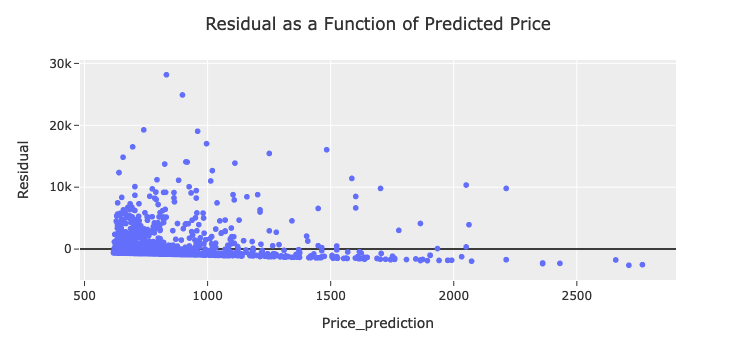

In [102]:
fig = px.scatter(DF_model2,x='Price_prediction',y='Residual')

# Update layout to show axis line at y=0
fig.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"}
)

fig.update_layout(template="ggplot2",
                  title='Residual as a Function of Predicted Price',
                  title_x=0.5
                 )

fig.show()

**Q1** What do you see here? Does this residual data seem uniformly distributed?

In the plot above I notcied that most of the data is grouped together at the lower left side of the graph. So, the residual is lower when the predicted price is lower. Therefore, the residual data doesn't seem to be uniformly distributed because the plot doesn't display a linear function.

## From Lecture - Consider the skew in the data

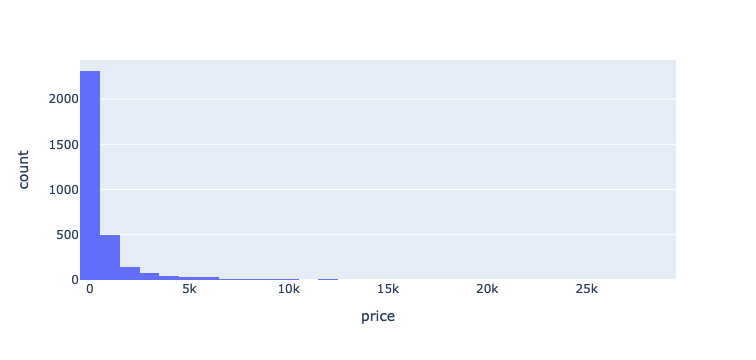

In [107]:
# Plot a histogram - notice that it is very skewed
fig = px.histogram(DF_model2,x='price',nbins =30)
fig.show()

In [109]:
# Us numpy to take the natural log of the data - removing the exponential decay
DF_model2['log_price'] = np.log(DF_model2['price'])

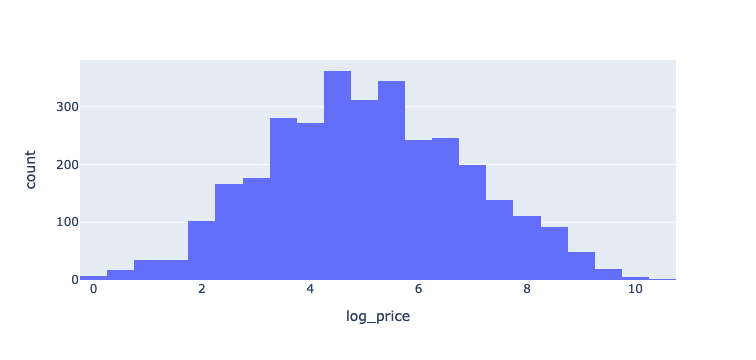

In [111]:
# Plot a histogram of the log(price) - notice we have removed the skew
fig = px.histogram(DF_model2,x='log_price',nbins =30)

fig.show()

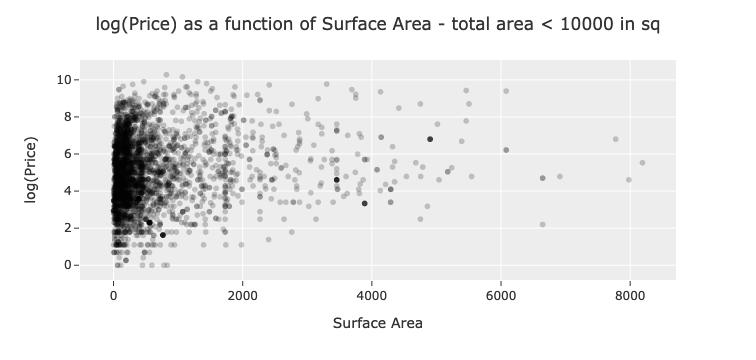

In [113]:
# Look at the scatter plot of the log(price)
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='log_price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='log(Price) as a function of Surface Area - total area < 10000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='log(Price)')


fig.show()

**Q2** What is different about the histogram and the scatter plots after taking the natural log?

The first histogram, with no log, displayed skewed data. Basically, this data had too many outliers that forbid us from finding any accurate answers. So, we applied a natural log, this log would remove the exponential dependence (outliers). Due to this log, the second histogram had a clear pattern wiht no visible outliers. 

The first scatter plot, with no log, displayed data that was skewed to the lower left side. However, the second sctter plot, with a log, displayed data that wasn't skewed and that flowed evenly.

**Exercise 2:** Redo the linear regression analysis except this time use the log_price.

- Find the linear regression model (LM)
- Calculate the residual
- Plot the Residual as a function of the predicted log price
- Plot a scatter plot of the data with the linear regression line added.

*HINT* You can see my results in the lecture notes!

In [276]:
X=DF_model2['Surface'].values.reshape(-1,1)
y=DF_model2['log_price']

In [278]:
LM=LinearRegression()
LM.fit(X,y)

LinearRegression()

In [280]:
LM.score(X,y)

0.013268243020669424

In [282]:
DF_model2['log_price_predicted'] = LM.predict(X)
DF_model2['Residual'] = DF_model2['log_price']-DF_model2['log_price_predicted']
DF_model2

Surface  price  Price_prediction  Residual  log_price  \
0      1091.5  360.0        904.234443  0.715222   5.886104   
1       252.0    6.0        683.985984 -3.179660   1.791759   
2       208.0   12.0        672.442289 -2.476058   2.484907   
3       252.0    6.0        683.985984 -3.179660   1.791759   
4       252.0    6.0        683.985984 -3.179660   1.791759   
...       ...    ...               ...       ...        ...   
3388    387.0   18.0        719.404140 -2.113123   2.890372   
3389    214.5   25.0        674.147607 -1.743634   3.218876   
3390    720.0   80.0        806.768925 -0.700588   4.382027   
3391    621.0    5.0        780.795610 -3.449655   1.609438   
3392    621.0    5.0        780.795610 -3.449655   1.609438   

      log_price_predicted  
0                5.170882  
1                4.971419  
2                4.960965  
3                4.971419  
4                4.971419  
...                   ...  
3388             5.003495  
3389             4.962509  
3390             5.082615  
3391             5.059093  
3392             5.059093  

[3211 rows x 6 columns]

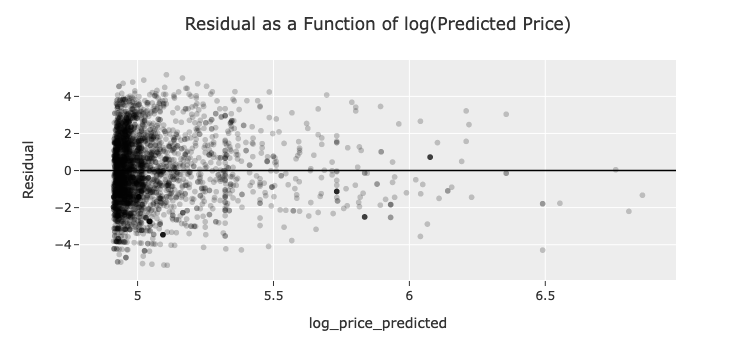

In [284]:
fig = px.scatter(DF_model2,
                 x='log_price_predicted',
                 y='Residual',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Residual as a Function of log(Predicted Price)',
                  title_x=0.5,
                  xaxis_title='log_price_predicted',
                  yaxis_title='Residual',
                 yaxis=dict(zeroline=True, zerolinewidth=1.5, zerolinecolor='black'))


fig.show()

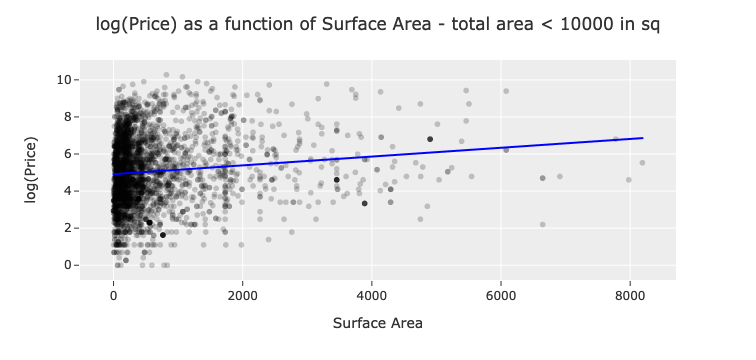

In [290]:
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='log_price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='log(Price) as a function of Surface Area - total area < 10000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='log(Price)')
fig.add_trace(
    px.line(DF_model2, x='Surface', y='log_price_predicted',color_discrete_sequence=['blue']).data[0])


fig.show()

### What did we learn...

What is the model telling me?

$$ \hat{\log(price)} = 4.912 + 0.00024(Surface Area)$$

so we can calculate (see the lecture for details!)

$$ (SA+1) \sim 1.0002400288023041 * SA$$

This tells us that increase the area of the painting by one square inch increases the price by a factor of 1.0002400288023041 or about 0.024%.

There is a small positive increase in the price as the surface area increases, on average. 

Can we predict the price using the surface area? Look at LM.score(X,y)...

It does not appear that our logistic regression is a good predictor of the price. Even though it looks like we captured a good linear relationship, we do not have a good predictor. The scatter is still very large!

BUT - we are still able to see a linear trend in the model. There is a relationship here even though the data is very noisy!

**Exercise 3** Redo the full analysis except this time try using just height to predict price.

- Do a standard linear regression of the height vs. the price (without log) discuss the results. This should include a plot of the residuals and a plot showing the linear fit. You should also talk about what the score, intercept and coefficient of the model are telling you. EG. As the height increases by 1in the price.....
- Do a linear regression of the height vs. log_price and discuss the results. This should include a plot of the residuals and a plot showing the linear fit. You should also talk about what the score, intercept and coefficient of the model are telling you. EG. As the height increases by 1in the price..... Remember in this case you have to use the rules of logs and exponents to interpret the results.

Which of these models do you think is doing a better job of capturing the functional relationships in the price vs height data? Why?

In [419]:
my_columns = ['Height_in','price']
DF_model3 = DF[my_columns]
DF_model3
DF_model3.dropna(inplace=True)
DF_model3['price']=DF_model3['price'].apply(lambda x: float(x))
DF_model3['Height_in']=DF_model3['Height_in'].apply(lambda x: float(x))
DF_model3.dtypes

Height_in    float64
price        float64
dtype: object

In [421]:
LM = LinearRegression()
LM.fit(X, y)

LinearRegression()

In [423]:
X = DF_model3['Height_in'].values.reshape(-1, 1)
y = DF_model3['price'].values

In [425]:
DF_model3['price_prediction']=LM.predict(X)
#DF_model3

In [427]:
DF_model3['Residual']=DF_model3['price']-DF_model3['price_prediction']
DF_model3

Height_in  price  price_prediction    Residual
0          37.0  360.0          5.251788  354.748212
1          18.0    6.0          5.054908    0.945092
2          13.0   12.0          5.003097    6.996903
3          14.0    6.0          5.013459    0.986541
4          14.0    6.0          5.013459    0.986541
...         ...    ...               ...         ...
3388       18.0   18.0          5.054908   12.945092
3389       13.0   25.0          5.003097   19.996903
3390       24.0   80.0          5.117080   74.882920
3391       27.0    5.0          5.148167   -0.148167
3392       27.0    5.0          5.148167   -0.148167

[3141 rows x 4 columns]

**Plot of the Residuals:**

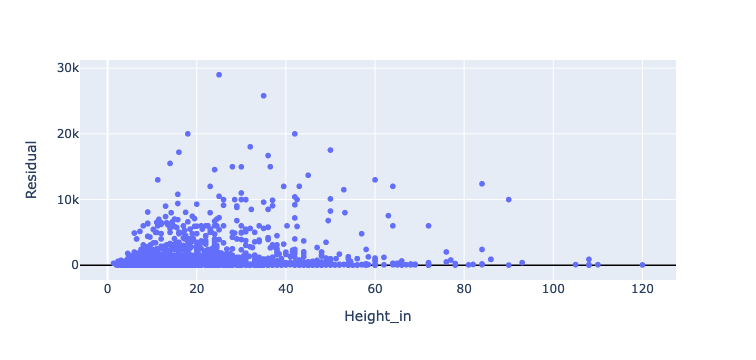

In [430]:
fig=px.scatter(DF_model3,x='Height_in',y='Residual')
fig.update_layout(yaxis=dict(zeroline=True, zerolinewidth=1.5, zerolinecolor='black'))
fig.show()

In [432]:
print(LM.coef_)
print(LM.intercept_)
print(LM.score(X,y))

[0.01036213]
4.868389335057933
-0.16135254693950318


**Plot showing the linear fit:**

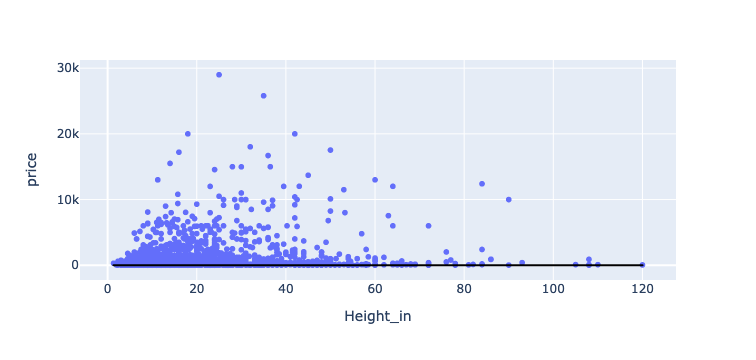

In [435]:
fig=px.scatter(DF_model3,x='Height_in',y='price')
fig.add_trace(
    px.line(DF_model3, x='Height_in', y='price_prediction',color_discrete_sequence=['black']).data[0])
fig.show()

In [437]:
print(LM.coef_)
print(LM.intercept_)
print(LM.score(X,y))

[0.01036213]
4.868389335057933
-0.16135254693950318


**Explanation:**

The slope is 0.010

The intercept is 4.868

For every inch that the height increase the price increases by a factor 0.036%. 

In [451]:
my_columns = ['Height_in','price']
DF_model4 = DF[my_columns]
DF_model4
DF_model4['log_price'] = np.log(DF_model4['price'])

In [453]:
#my_columns = ['Height_in','log_price']
#DF_model4 = DF[my_columns]
#DF_model4
DF_model4.dropna(inplace=True)
DF_model4['log_price']=DF_model4['log_price'].apply(lambda x: float(x))
DF_model4['Height_in']=DF_model4['Height_in'].apply(lambda x: float(x))
DF_model4.dtypes

Height_in    float64
price        float64
log_price    float64
dtype: object

In [455]:
LM = LinearRegression()
LM.fit(X, y)

LinearRegression()

In [457]:
X = DF_model4['Height_in'].values.reshape(-1, 1)
y = DF_model4['log_price'].values

In [459]:
DF_model4['log_price_prediction']=LM.predict(X)

In [461]:
DF_model4['Residual']=DF_model4['log_price']-DF_model4['log_price_prediction']
DF_model4

Height_in  price  log_price  log_price_prediction  Residual
0          37.0  360.0   5.886104              5.251788  0.634316
1          18.0    6.0   1.791759              5.054908 -3.263148
2          13.0   12.0   2.484907              5.003097 -2.518190
3          14.0    6.0   1.791759              5.013459 -3.221700
4          14.0    6.0   1.791759              5.013459 -3.221700
...         ...    ...        ...                   ...       ...
3388       18.0   18.0   2.890372              5.054908 -2.164536
3389       13.0   25.0   3.218876              5.003097 -1.784221
3390       24.0   80.0   4.382027              5.117080 -0.735054
3391       27.0    5.0   1.609438              5.148167 -3.538729
3392       27.0    5.0   1.609438              5.148167 -3.538729

[3141 rows x 5 columns]

**(Log Price) Plot of the Residuals:**

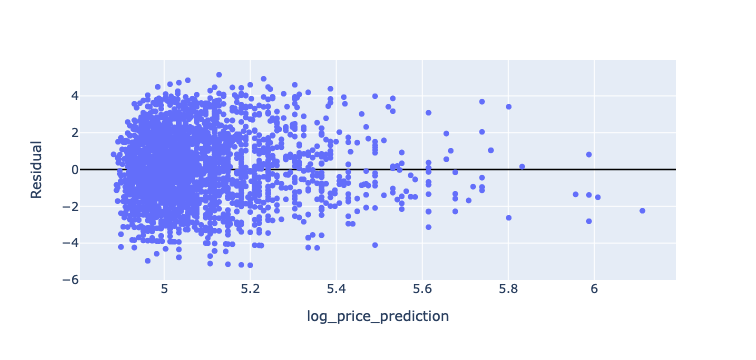

In [464]:
fig=px.scatter(DF_model4,x='log_price_prediction',y='Residual')
fig.update_layout(yaxis=dict(zeroline=True, zerolinewidth=1.5, zerolinecolor='black'))
fig.show()

In [466]:
print(LM.coef_)
print(LM.intercept_)
print(LM.score(X,y))

[0.01036213]
4.868389335057933
0.006754700790331358


**(Log Price) Plot showing the linear fit:**

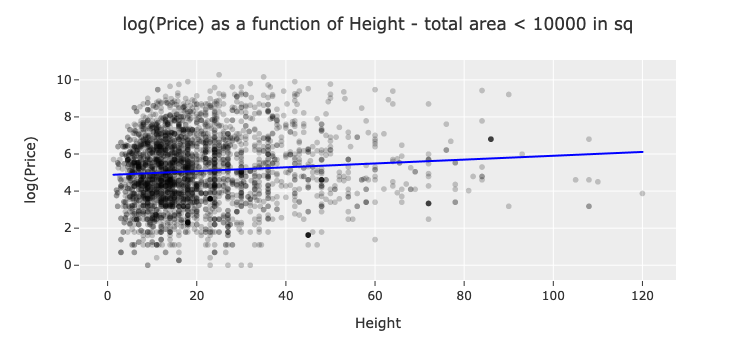

In [469]:
#fig=px.scatter(DF_model4,x='Height_in',y='log_price')
#fig.show()

fig = px.scatter(DF_model4,
                 x='Height_in',
                 y='log_price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                 title='log(Price) as a function of Height - total area < 10000 in sq',
                  title_x=0.5,
                  xaxis_title='Height',
                  yaxis_title='log(Price)')
fig.add_trace(
    px.line(DF_model4, x='Height_in', y='log_price_prediction',color_discrete_sequence=['blue']).data[0])


fig.show()

In [471]:
print(LM.coef_)
print(LM.intercept_)
print(LM.score(X,y))

[0.01036213]
4.868389335057933
0.006754700790331358


**Explanation:**

The slope is 0.010

The intercept is 4.868

For every inch the the height increase, the price will increase by a factor of 0.036%.